In [1]:

!git clone https://github.com/YIKUAN8/Transformers-VQA.git
%cd Transformers-VQA/
!pip install -r requirements.txt

Cloning into 'Transformers-VQA'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 182 (delta 67), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (182/182), 1.94 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/Transformers-VQA
     |████████████████████████████████| 133kB 5.1MB/s 
     |████████████████████████████████| 7.6MB 31.4MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
ERROR: botocore 1.20.93 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [2]:
!wget https://convaisharables.blob.core.windows.net/uniter/pretrained/uniter-base.pt -P models/pretrained/
# !wget --no-check-certificate https://nlp1.cs.unc.edu/data/model_LXRT.pth -P models/pretrained/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kuPr187zWxSJbtCbVW87XzInXltM-i9Y' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kuPr187zWxSJbtCbVW87XzInXltM-i9Y" -O models/pretrained/visualbert.th && rm -rf /tmp/cookies.txt

--2021-06-13 10:57:39--  https://convaisharables.blob.core.windows.net/uniter/pretrained/uniter-base.pt
Resolving convaisharables.blob.core.windows.net (convaisharables.blob.core.windows.net)... 13.77.184.64
Connecting to convaisharables.blob.core.windows.net (convaisharables.blob.core.windows.net)|13.77.184.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273600756 (261M) [application/octet-stream]
Saving to: ‘models/pretrained/uniter-base.pt’

uniter-base.pt      100%[===================>] 260.93M  18.3MB/s    in 14s     

2021-06-13 10:57:54 (18.3 MB/s) - ‘models/pretrained/uniter-base.pt’ saved [273600756/273600756]

--2021-06-13 10:57:54--  https://docs.google.com/uc?export=download&confirm=zxFB&id=1kuPr187zWxSJbtCbVW87XzInXltM-i9Y
Resolving docs.google.com (docs.google.com)... 172.217.219.139, 172.217.219.101, 172.217.219.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.219.139|:443... connected.
HTTP request sent, awaiting response... 

In [9]:
# # training
# !wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Annotations_Train_abstract_v002.zip -O data/test_train_annotation.zip
# !unzip data/test_train_annotation.zip -d data/

# # training question
# !wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Questions_Train_abstract_v002.zip -O data/test_train_question.zip
# !unzip data/test_train_question.zip -d data/

# training images
!wget https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/scene_img/scene_img_abstract_v002_train2015.zip -O data/test_train_image.zip
!unzip data/test_train_image.zip -d data/testset

Streaming output truncated to the last 5000 lines.
  inflating: data/testset/abstract_v002_train2015_000000015000.png  
  inflating: data/testset/abstract_v002_train2015_000000015001.png  
  inflating: data/testset/abstract_v002_train2015_000000015002.png  
  inflating: data/testset/abstract_v002_train2015_000000015003.png  
  inflating: data/testset/abstract_v002_train2015_000000015004.png  
  inflating: data/testset/abstract_v002_train2015_000000015005.png  
  inflating: data/testset/abstract_v002_train2015_000000015006.png  
  inflating: data/testset/abstract_v002_train2015_000000015007.png  
  inflating: data/testset/abstract_v002_train2015_000000015008.png  
  inflating: data/testset/abstract_v002_train2015_000000015009.png  
  inflating: data/testset/abstract_v002_train2015_000000015010.png  
  inflating: data/testset/abstract_v002_train2015_000000015011.png  
  inflating: data/testset/abstract_v002_train2015_000000015012.png  
  inflating: data/testset/abstract_v002_train2015_00

In [55]:
from vqa_model import VQAModel

# ! pwd
from param import args
args.__dict__

# args.batch_size = 18
args.epochs = 2
args.model = 'visualbert' # use visualbert
args.load_pretrained = '/content/Transformers-VQA/models/pretrained/visualbert.th' #load pretrained visualbert model
# args.max_seq_length = 128 #truncate or pad report lengths to 128 subwords



In [104]:
!pip install 2to3 

In [121]:
!2to3 -w vqa_c.py

RefactoringTool: Skipping optional fixer: buffer
RefactoringTool: Skipping optional fixer: idioms
RefactoringTool: Skipping optional fixer: set_literal
RefactoringTool: Skipping optional fixer: ws_comma
RefactoringTool: Refactored vqa_c.py
--- vqa_c.py	(original)
+++ vqa_c.py	(refactored)
@@ -34,18 +34,18 @@
 		self.qqa = {}
 		self.imgToQA = {}
 		if not annotation_file == None and not question_file == None:
-			print 'loading VQA annotations and questions into memory...'
+			print('loading VQA annotations and questions into memory...')
 			time_t = datetime.datetime.utcnow()
 			dataset = json.load(open(annotation_file, 'r'))
 			questions = json.load(open(question_file, 'r'))
-			print datetime.datetime.utcnow() - time_t
+			print(datetime.datetime.utcnow() - time_t)
 			self.dataset = dataset
 			self.questions = questions
 			self.createIndex()
 
 	def createIndex(self):
         # create index
-		print 'creating index...'
+		print('creating index...')
  		imgToQA = {ann['image_id

In [126]:
from vqa_c import VQA
train_a_json = '/content/Transformers-VQA/data/abstract_v002_train2015_annotations.json'
train_q_json = '/content/Transformers-VQA/data/MultipleChoice_abstract_v002_train2015_questions.json'
train_vqa = VQA(train_a_json, train_q_json)

loading VQA annotations and questions into memory...
0:00:02.763052
creating index...
index created!


In [188]:
# 获取问题ID
train_question_ids = train_vqa.getQuesIds()
# 获取图片ID
train_image_ids = train_vqa.getImgIds()


x = train_vqa.loadQA(train_question_ids[0])
train_vqa.showQA(x)


Question: Who looks happier?
Answer 1: old person
Answer 2: man
Answer 3: man
Answer 4: man
Answer 5: old man
Answer 6: man
Answer 7: man
Answer 8: man
Answer 9: man
Answer 10: grandpa


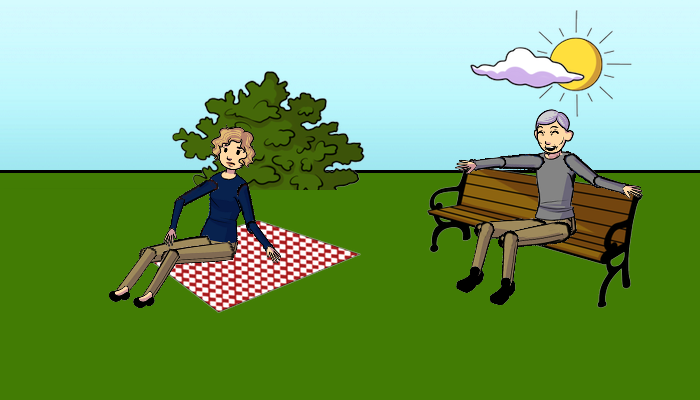

In [153]:
from IPython.display import Image
Image(filename='/content/Transformers-VQA/data/testset/abstract_v002_train2015_000000011779.png') 
